La base de datos de la inegi nos proprciona la siguiente información:
- PROD_EST: Es la estadisitica de Vehiculos de motor registrados en circulacion de forma anual.
- COBERTURA: La area geografica en la que se basan las entidades, marcadas como Municipio
- ANIO: Periodo de tiempo en el cual se realizaron los registros, marcado como 2024
- ID_ENTIDAD: Clave de la entidad federativa de México, va del 1 al 32 respresentando cada estado de México.
- ID_MUNICIPIO: Clave del municipio con respecto a la Entidad federativa que pertenece, representados por numeros representando cada ciudad dentro del estado.
- AUTO_OFICIAL: Autos que cuantan con hasta 7 asientos son utilizados por los organismos gubernamentales en el municipio.
- AUTO_PUBLICO: Autos que cuantan con hasta 7 asientos son utilizados como servicios para el traslado de personas, bienes o mercancia en el municipio.
- AUTO_PARTICULAR: Autos que cuantan con hasta 7 asientos son de la propiedad de cada persona en el municipio.
- CAM_PAS_OFICIAL: autobuses urbanos y suburbanos, microbuses, camiones escolares, camionetas pick-up (utilizadas para el transporte de trabajadores), los vehiculos con más de 7 asientos, cuyas unidades son utilizadas por los organismos gubernamentales para satisfacer sus propios requerimientos y/o atender las necesidades de la población.
- CAM_PAS_PUBLICO: Autobuses urbanos y suburbanos, microbuses, camiones escolares, camionetas pick-up (utilizadas para el transporte de trabajadores), los vehiculos con más de 7 asientos, cuyas unidades son utilizadas por el publico en general como un servicio.
- CAM_PAS_PARTICULAR: Autobuses urbanos, microbuses, camiones escolares, camionetas pick-up (utilizadas para el transporte de trabajadores), los vehiculos con más de 7 asientos. Las unidades son destinadas al autotransporte de pasajeros o bienes por cuenta propia.
- CYC_CARGA_OFICIAL: Camiones de carga diseñados para el remolque que son utilizadas por los organismos gubernamentales.
- CYC_CARGA_PUBLICO: Camiones de carga diseñados para el remolque que son utilizadas como servicio para el traslado de bienes o mercancías.
- CYC_CARGA_PARTICULAR: Camiones de carga diseñados para el remolque que son destinadas al autotransporte de bienes o mercancías por cuenta propia.
- MOTO_OFICIAL: Vehiculos automotor de dos, tres o cuatro ruedas, utlizadas por los organmismos gubernamentales.
- MOTO_DE_ALQUILER: Vehiculos automotor de dos, tres o cuatro ruedas, que son utilizadas por el público en general como un servicio.
- MOTO_PARTICULAR: Vehiculos automotor de dos, tres o cuatro ruedas, destinadas al autotransporte de pasajeros o bienes.
- ESTATUS: Cambios a la información divulgada en las publicaciones estadíticas y geográficas del INEGI.

Al analizar la base de datos, puedo notar que entre mas aumeneta los Autos particulares tambien lo haran las Motos particulares, es por esto que considero que estas variables son aptas para una regresión lineal


Nombres de variables y datos
                                             PROD_EST  COBERTURA  ANIO  \
0  Vehículos de motor registrados en circulación....  Municipal  2024   
1  Vehículos de motor registrados en circulación....  Municipal  2024   
2  Vehículos de motor registrados en circulación....  Municipal  2024   
3  Vehículos de motor registrados en circulación....  Municipal  2024   
4  Vehículos de motor registrados en circulación....  Municipal  2024   

   ID_ENTIDAD  ID_MUNICIPIO  AUTO_OFICIAL  AUTO_PUBLICO  AUTO_PARTICULAR  \
0           1             1           452          4741           368872   
1           1             2             0            36             6870   
2           1             3             1           168            13988   
3           1             4             2            21             2700   
4           1             5            24           243            41830   

   CAM_PAS_OFICIAL  CAM_PAS_PUBLICO  CAM_PAS_PARTICULAR  CYC_CARGA_OFICIAL

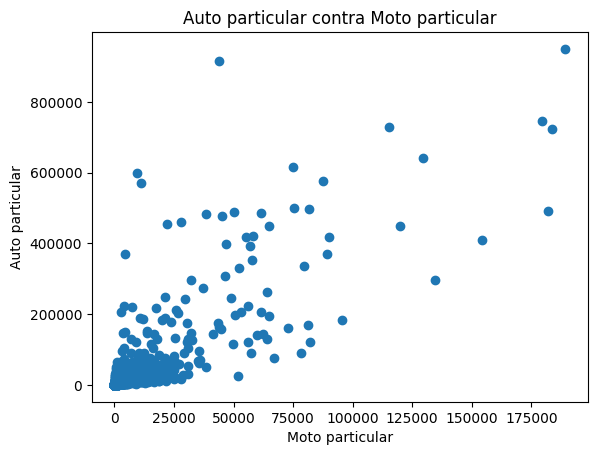

PROD_EST
Vehículos de motor registrados en circulación. Anual    2478
Name: count, dtype: int64
COBERTURA
Municipal    2478
Name: count, dtype: int64
ANIO
2024    2478
Name: count, dtype: int64
ESTATUS
Cifras Definitivas    2478
Name: count, dtype: int64

Nueva base de datos
    ID_ENTIDAD  AUTO_OFICIAL  AUTO_PUBLICO  AUTO_PARTICULAR  CAM_PAS_OFICIAL  \
0           1           452          4741           368872                5   
1           1             0            36             6870                0   
2           1             1           168            13988                0   
3           1             2            21             2700                0   
4           1            24           243            41830                0   

   CAM_PAS_PUBLICO  CAM_PAS_PARTICULAR  CYC_CARGA_OFICIAL  CYC_CARGA_PUBLICO  \
0             2497                 619                557               3599   
1                2                  18                  6                 20   
2       

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos = pd.read_csv('P1-Vehiculos-en-Circulacion.csv')
print("Nombres de variables y datos\n", datos.head())
print("\nTipo de datos\n", datos.dtypes)
print("\nDimensiones totales:", datos.shape, "\n")

Y_AP=datos.AUTO_PARTICULAR
X_MP=datos.MOTO_PARTICULAR
plt.scatter(X_MP, Y_AP)
plt.title("Auto particular contra Moto particular")
plt.xlabel("Moto particular")
plt.ylabel("Auto particular")
plt.show()

print(datos.PROD_EST.value_counts())
print(datos.COBERTURA.value_counts())
print(datos.ANIO.value_counts())
print(datos.ESTATUS.value_counts())

datos=datos.drop(['PROD_EST'], axis=1)
datos=datos.drop(['COBERTURA'], axis=1)
datos=datos.drop(['ANIO'], axis=1)
datos=datos.drop(['ESTATUS'], axis=1)

datos=datos.drop(['ID_MUNICIPIO'], axis=1)

print("\nNueva base de datos\n", datos.head(), "\n")
print(datos.dtypes)

Importamos la base de datos y analizamos y comparamos si las variables que dijimos se pudiesen hacer en una regresion lineal y yo considero que si ya que tiene muchos datos agrupados, exceptuando por aquellos que son muy lejanos,

Realizamos una eliminicacion de variables puesto a que esas variables solo nos indican un solo valor fijo igual a la cantidad de datos que tiene la base de datos, por lo que no es de utilidad.

A su vez eliminamos la variable ID_MUNICIPIO, ya que esta nos sepraria los datos de una forma que no queremos y ya que se repiten los mismos datos al pasar de Entidad, en realidad no estariamos comparando nada.

Ahora realizaremos una limpieza en la base de datos para que sea mas facil de manejar, como a su vez sea mejor para el modelo.

**Huecos y Outliers**

In [273]:
datos.dropna(inplace=True)
datos_sin_huecos = datos.dropna(inplace=True, axis=1)
print("\nVerificando si se elimino algun hueco:", datos.shape)

q1=datos.MOTO_PARTICULAR.quantile(0.25)
q3=datos.MOTO_PARTICULAR.quantile(0.75)
iqr=q3-q1
li=q1-(3*iqr)
ls=q3+(3*iqr)
out=np.where((datos.AUTO_PARTICULAR<=li) | (datos.AUTO_PARTICULAR>=ls))[0]
print(datos.iloc[out,:])
datos = datos.drop(out).reset_index(drop=True)


Verificando si se elimino algun hueco: (2478, 13)
      ID_ENTIDAD  AUTO_OFICIAL  AUTO_PUBLICO  AUTO_PARTICULAR  \
0              1           452          4741           368872   
1              1             0            36             6870   
2              1             1           168            13988   
4              1            24           243            41830   
5              1             7           192            10518   
...          ...           ...           ...              ...   
2461          32             5            46            10535   
2467          32             3           129             7569   
2468          32             5            29             6717   
2474          32             4            53             8426   
2475          32           196           563            60126   

      CAM_PAS_OFICIAL  CAM_PAS_PUBLICO  CAM_PAS_PARTICULAR  CYC_CARGA_OFICIAL  \
0                   5             2497                 619                557   
1     

Con el comando dropna() se eliminaran todos los valores en las filas y columnas que no contengan datos o que tengan NA. Para confirmar si habia huecos imprimiremos nuevamente las dimensiones de la base dato y nos damos cuenta de que sigue estando igual.

Realizamos el metodo TUKEY para asi poder eliminar los valores atipicos que se presentan en la variable AUTO_PARTICULAR para que al momento de predecir o analisar esta variable sea mejor.

**Variables Cualitativas**

In [274]:
datos_encoded=datos.copy()

if datos_encoded["ID_ENTIDAD"].dtype == 'bool':
    datos_encoded["ID_ENTIDAD"] = datos_encoded["ID_ENTIDAD"].astype(int)
else:
    datos_encoded["ID_ENTIDAD"] = datos_encoded["ID_ENTIDAD"].astype("category")

datos_encoded = pd.get_dummies(datos_encoded, columns=["ID_ENTIDAD"], drop_first=True)

datos_encoded = datos_encoded.copy()
for col in datos_encoded.columns:
    if datos_encoded[col].dtype=='bool':
        datos_encoded[col]=datos_encoded[col].astype(int)
numeric_cols=datos_encoded.select_dtypes(include=np.number)

print("Shape final:", numeric_cols.shape)
print(numeric_cols.head())

Shape final: (1906, 40)
   AUTO_OFICIAL  AUTO_PUBLICO  AUTO_PARTICULAR  CAM_PAS_OFICIAL  \
0             2            21             2700                0   
1             3            50             1819                0   
2             0            43             3513                0   
3             2            45             4293                0   
4             0             5             3318                0   

   CAM_PAS_PUBLICO  CAM_PAS_PARTICULAR  CYC_CARGA_OFICIAL  CYC_CARGA_PUBLICO  \
0                0                   6                  7                  0   
1                1                   4                  2                  0   
2                0                   6                  9                  1   
3                0                   4                  4                  0   
4               73                   4                  0                 56   

   CYC_CARGA_PARTICULAR  MOTO_OFICIAL  ...  ID_ENTIDAD_22  ID_ENTIDAD_24  \
0               

Convertiremos la variable ID_ENTIDAD a booleanos ya que esta analizando el diccionario es en realidad una variable cualitativa aunque tenga numeros enteros. Por esto despues de convertir a booleanos crearemos una nueva variable para cada numero cualitativo. Despues pasaremos estos valores booleanos a 0 y 1 para su mejor uso

**Colinealidad**

2 8
0.8460044291371867


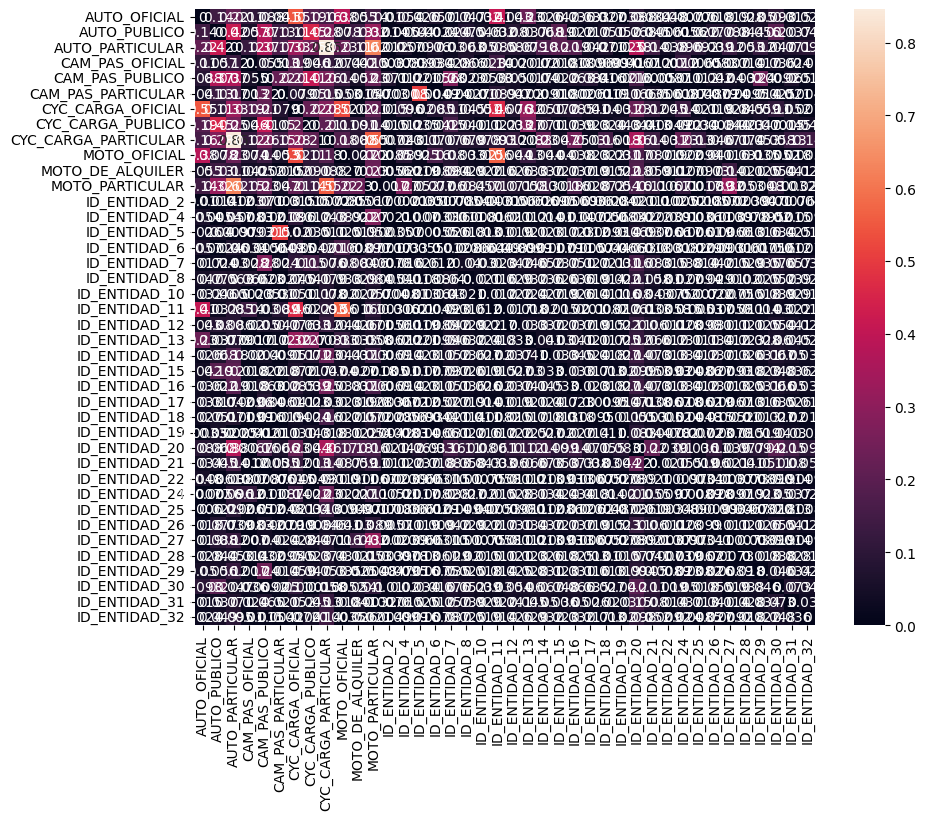

3 9
0.8460044291371867


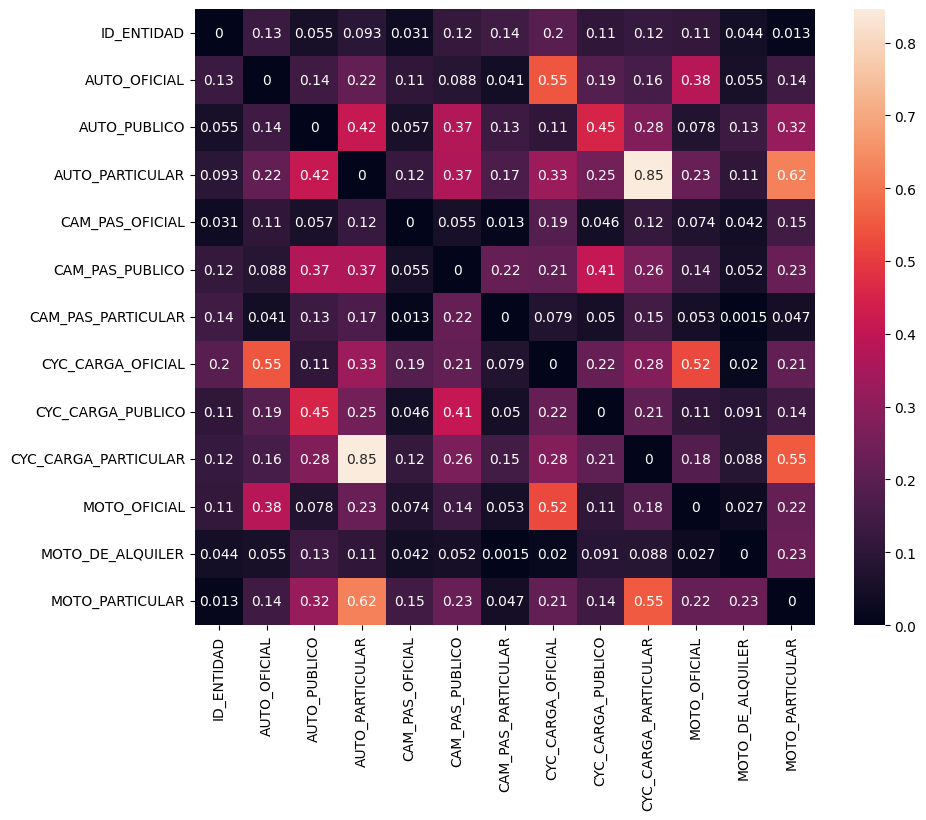

In [275]:
import seaborn as sns

#Heatmap con las variables dummy ID_ENTIDAD
cor = abs(np.corrcoef(numeric_cols, rowvar=False))
np.fill_diagonal(cor, 0)
i, j = np.unravel_index(cor.argmax(), cor.shape)
print(i, j)
print(cor[i, j])

plt.figure(figsize=(10, 8))
sns.heatmap(
    cor, annot=True, xticklabels=numeric_cols.columns, yticklabels=numeric_cols.columns,
)
plt.show()

#Heatmap sin la variable ID_ENTIDAD
cor = abs(np.corrcoef(datos, rowvar=False))
np.fill_diagonal(cor, 0)
i, j = np.unravel_index(cor.argmax(), cor.shape)
print(i, j)
print(cor[i, j])

plt.figure(figsize=(10, 8))
sns.heatmap(
    cor, annot=True, xticklabels=datos.columns, yticklabels=datos.columns,
)
plt.show()

Realizamos 2 heatmaps ya que el primero no se puede analizar claramente y a su vez que no proporciona informacion relevante puesto que la mayoria de esas correlaciones son extremadamente bajas

A su vez en el segundo heatmap vemos que hay coorealaciones bastantes grandes , la cual es la variable CYC_CARGA_PARTICULAR , pero en este caso no la eliminaremos porque su eliminacion podria ocacionar estragos en la efectividad de las regresiones, ya que su colinealidad con las otras variables es importante para mas adelante.

**Interacción**



In [276]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(numeric_cols.drop("AUTO_PARTICULAR",axis=1),
                                                    numeric_cols.AUTO_PARTICULAR,
                                                    train_size = 0.8,
                                                    random_state=32)

X_train.insert(2,"Moto partiular y Carga Oficial",X_train.MOTO_DE_ALQUILER*X_train.CYC_CARGA_OFICIAL)
X_test.insert(2,"Moto partiular y Carga Oficial",X_test.MOTO_DE_ALQUILER*X_test.CYC_CARGA_OFICIAL)
X_train.insert(4,"Moto oficial y Autobuses publicos",X_train.MOTO_OFICIAL*X_train.CAM_PAS_PUBLICO)
X_test.insert(4,"Moto oficial y Autobuses publicos",X_test.MOTO_OFICIAL*X_test.CAM_PAS_PUBLICO)
X_train.head()
X_test.head()

,AUTO_OFICIAL,AUTO_PUBLICO,Moto partiular y Carga Oficial,CAM_PAS_OFICIAL,Moto oficial y Autobuses publicos,CAM_PAS_PUBLICO,CAM_PAS_PARTICULAR,CYC_CARGA_OFICIAL,CYC_CARGA_PUBLICO,CYC_CARGA_PARTICULAR,...,ID_ENTIDAD_22,ID_ENTIDAD_24,ID_ENTIDAD_25,ID_ENTIDAD_26,ID_ENTIDAD_27,ID_ENTIDAD_28,ID_ENTIDAD_29,ID_ENTIDAD_30,ID_ENTIDAD_31,ID_ENTIDAD_32
434,0,5,0,0,0,0,1,1,0,1685,...,0,0,0,0,0,0,0,0,0,0
847,0,0,0,0,0,0,3,0,0,48,...,0,0,0,0,0,0,0,0,0,0
1186,0,24,0,0,0,0,0,0,0,171,...,0,0,0,0,0,0,0,0,0,0
789,2,125,1188,10,0,1,8,9,3,861,...,0,0,0,0,0,0,0,0,0,0
759,0,0,0,0,0,0,0,0,0,15,...,0,0,0,0,0,0,0,0,0,0


Para que el analisis de estos datos no este variando constantemente usamos el random state y la establecemos en 32 para que nos porporcione algunos de los valores que realmente son los mejores para el sistema y asi evitar una fuga en los datos.

A su vez realizaremos la división entre datos de prueba y entrenamiento de la variable AUTO_PARTICULAR

A su vez realizaremos la interaccion de dos variables que tienen poca colinearidad como se vio en el heatmap para generar un mejor desempeño.

**Seleccion Mixta**

In [277]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()

sfsForward=SFS(estimator,
                  k_features=(3,10),
                  forward=True,
                  scoring='r2',
                  cv=10)
modeloF=sfsForward.fit(X_train, Y_train)
selected_variablesF=list(modeloF.k_feature_names_)


from sklearn.metrics import r2_score
x_train_selectedF=X_train[selected_variablesF]
x_test_selectedF=X_test[selected_variablesF]


sfsFBward =SFS(estimator,
                  k_features=(3,10),
                  forward=False,
                  scoring='r2',
                  cv=10)
ModeloFB=sfsFBward.fit(x_train_selectedF,Y_train)

print("Variables seleccionadas:\n", ModeloFB.k_feature_names_)

X_train_selectedFB=X_train[list(ModeloFB.k_feature_names_)]
X_test_selectedFB=X_test[list(ModeloFB.k_feature_names_)]
estimator.fit(X_train_selectedFB,Y_train)


Variables seleccionadas:
 ('AUTO_PUBLICO', 'CAM_PAS_PUBLICO', 'CYC_CARGA_PARTICULAR', 'MOTO_PARTICULAR', 'ID_ENTIDAD_13', 'ID_ENTIDAD_15', 'ID_ENTIDAD_17', 'ID_ENTIDAD_18', 'ID_ENTIDAD_24', 'ID_ENTIDAD_29')


LinearRegression()

Generamos una seleccion de caracteristicas mixta para tener una mejor eficacia, ya que aunque tiene varias variables no son suficientes para que esta parte del programa se relantice demasiado y ademas esto genera grandes resultados.

A su vez estas carecterisitcas seleccionados las añidaremos a la base de datos nueva para realizar predicciones mas adelante.

**Linear y No linear de una variable**

In [278]:
import statsmodels.api as sm
Y_AP=datos.AUTO_PARTICULAR
X_MP=datos.MOTO_PARTICULAR
X_MP=sm.add_constant(X_MP)
model = sm.OLS(Y_AP,X_MP)
results = model.fit()
print(results.summary())

from sklearn.neighbors import KNeighborsRegressor as KNN
mknn = KNN(n_neighbors=5).fit(X_MP,Y_AP)
yHat_KNN = mknn.predict(X_MP)
print(mknn.get_params())

                            OLS Regression Results                            
Dep. Variable:        AUTO_PARTICULAR   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     1213.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):          4.06e-206
Time:                        08:55:02   Log-Likelihood:                -16217.
No. Observations:                1906   AIC:                         3.244e+04
Df Residuals:                    1904   BIC:                         3.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             775.3876     31.106     

Se realiza un OLS para sacar todos los datos posibles al solo analizar la variable AUTO_PARTICULAR vs MOTO_PARTICULAR donde se puede ver que la variable MOTO_PARTICULAR tiene una alta significancia en AUTO_PARTICULAR ya que es menor a 0.05.

A su vez el R2 y el R2 ajustada nos indican un 0.39 de que la linealidad pasara por los datos y al ser solo el analisis de 2 variables dentro de una base de datos de 41 esta linealidad es bastante alta los cual nos deja ver que tienen alta significancia y vamos por un buen camino.

**Error y Linealidad**

In [279]:
import statsmodels.api as sm

modelTotal = sm.OLS(Y_train,sm.add_constant(X_train_selectedFB))
results = modelTotal.fit()
print(results.summary())
print("\nP-values:\n", results.pvalues)

yHat_lin_selectedFB=estimator.predict(X_test_selectedFB)

from sklearn.neighbors import KNeighborsRegressor as KNN
mknn = KNN(n_neighbors=5).fit(X_test_selectedFB,Y_test)
yHat_KNN = mknn.predict(X_test_selectedFB)
print(mknn.get_params())

RSS_lin = sum((list(Y_test)-yHat_lin_selectedFB)**2)
RSE_lin = np.sqrt(RSS_lin/(len(Y_test)-1))

RSS_KNN = sum((list(Y_test)-yHat_KNN)**2)
RSE_KNN = np.sqrt(RSS_KNN/(len(Y_test)-1))
print("Comparacion del RSS\n RSS lineal: ", RSS_lin, "\n RSS KNN: ", RSS_KNN)
print("\nComparacion del RSE\n RSE lineal: ", RSE_lin, "\n RSE KNN: ", RSE_KNN)

from sklearn.metrics import r2_score
r2_lin = r2_score(Y_test, yHat_lin_selectedFB)
r2_KNN = r2_score(Y_test, yHat_KNN)
print("\nComparacion del R2\n R2 lineal: ", r2_lin, "\n R2 KNN: ", r2_KNN)

                            OLS Regression Results                            
Dep. Variable:        AUTO_PARTICULAR   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     815.9
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:55:02   Log-Likelihood:                -11951.
No. Observations:                1524   AIC:                         2.392e+04
Df Residuals:                    1513   BIC:                         2.398e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   51.1246 

Ahora volveremos a hacer algo parecido pero ahora si con todas las variables y las carecteristicas seleccionadas previamente, donde imprimiremos el RSS y el RSE para ver que metodo entre lineal multiple o KNN es mejo. En la cual nos damos cuenta que estas son menores al momento de tener errores.

De la misma manera imprimiremos la R2 para saber que modelo tiene mejor linealidad y vemos que el KNN sale mas alto por lo que en este caso tambien es mejor este modelos.

Asi que con estas metricas podemos llegar a concluir que el metodo de KNN es mejor param estos datos y no el de regresion lineal multiple como teniamos predicho.

**Analisis de los datos**

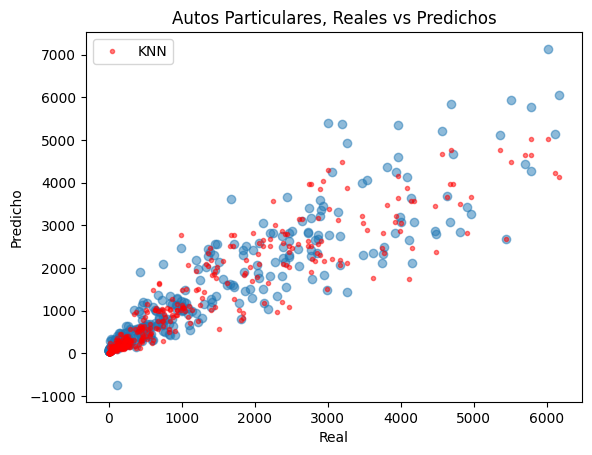

In [280]:
plt.scatter(Y_test, yHat_lin_selectedFB, alpha=0.5)
plt.plot(Y_test, yHat_KNN, 'r.', label='KNN', alpha=0.5)
plt.xlabel('Real')
plt.ylabel('Predicho')
plt.title('Autos Particulares, Reales vs Predichos')
plt.legend()
plt.show()

Podemos notar que entre mas se empiecen a dispersar los datos el KNN empezara a falla y los valores mas lejanos no los alcanzara a abarcar.

Estos nos indica que en realidad el modelo tiene errores al momento de que haya mas autos de los que esta acostumbrado el modelo KNN.

Tambien observamos que entre mas datos de autos reales halla, se podran predecir de mejor manera y estos sufren de casi una linealidad.